In [355]:
import keras
import pandas as pd
import numpy as np
from keras import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Input, LSTM, Embedding
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)
set_session(sess)
sess.as_default()
sess.graph.as_default()


In [25]:
data = np.genfromtxt('seqtrain.csv', delimiter=',')
train_X, train_Y = data[:, :29], data[:, 29:]
print(train_X.shape, train_Y.shape)

(4000, 29) (4000, 4)


In [32]:
test_data = np.genfromtxt('seqvalid.csv', delimiter=',')
test_X, test_Y = test_data[:, :29], test_data[:, 29:]
print(test_X.shape, test_Y.shape)

(1000, 29) (1000, 4)


In [211]:
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=29))
model.add(Dense(units=25, activation='relu', input_dim=29))
model.add(Dense(units=10, activation='relu', input_dim=29))
model.add(Dense(units=5, activation='relu', input_dim=29))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [130]:
history = model.fit(train_X, train_Y, epochs=150, batch_size=128, validation_data=(test_X, test_Y), verbose=0)

In [131]:
model.evaluate(test_X, test_Y)

1000/1000 [==============================] - 0s 63us/step


[1.8841854248046874, 0.504]

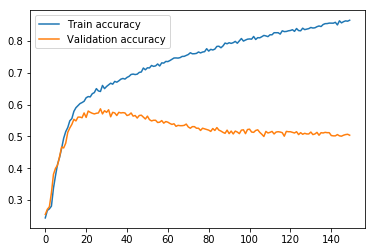

In [132]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Validation accuracy')
plt.legend()

In [445]:
model = Sequential()
model.add(Dense(units=14, activation='relu', input_dim=29))
model.add(Dense(units=7, activation='relu', input_dim=29))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, epochs=150, batch_size=128, validation_data=(test_X, test_Y), verbose=0)

In [446]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_292 (Dense)            (None, 14)                420       
_________________________________________________________________
dense_293 (Dense)            (None, 7)                 105       
_________________________________________________________________
dense_294 (Dense)            (None, 4)                 32        
Total params: 557
Trainable params: 557
Non-trainable params: 0
_________________________________________________________________


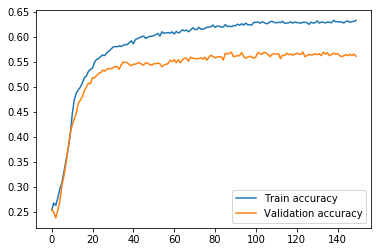

In [435]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Validation accuracy')
plt.legend()

In [313]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_72 (Conv1D)           (None, 29, 3)             12        
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 29, 7)             70        
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 29, 14)            308       
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 29, 28)            420       
_________________________________________________________________
flatten_23 (Flatten)         (None, 812)               0         
_________________________________________________________________
dense_196 (Dense)            (None, 10)                8130      
_________________________________________________________________
dense_197 (Dense)            (None, 5)                 55        
__________

In [336]:
model = Sequential()

model.add(Conv1D(filters=3, kernel_size=3, activation='relu', padding='same', input_shape=(29, 1)))

model.add(Conv1D(filters=7, kernel_size=5, activation='relu', padding='same'))
model.add(Conv1D(filters=14, kernel_size=3, activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [337]:
history = model.fit(np.expand_dims(train_X, axis=2), train_Y, epochs=75, batch_size=64, verbose=0, validation_data=(np.expand_dims(test_X, axis=2), test_Y))

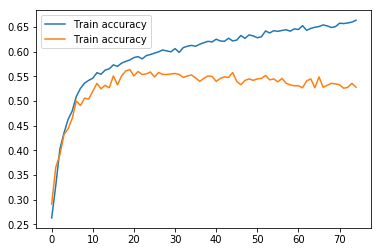

In [338]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Train accuracy')
plt.legend()

In [339]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 29, 3)             12        
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 29, 7)             112       
_________________________________________________________________
conv1d_98 (Conv1D)           (None, 29, 14)            308       
_________________________________________________________________
flatten_33 (Flatten)         (None, 406)               0         
_________________________________________________________________
dense_218 (Dense)            (None, 10)                4070      
_________________________________________________________________
dense_219 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_220 (Dense)            (None, 4)                 24        
Total para

In [340]:
model = Sequential()

model.add(Conv1D(filters=3, kernel_size=3, activation='relu', padding='same', input_shape=(29, 1)))
model.add(Conv1D(filters=3, kernel_size=3, activation='relu', padding='same', input_shape=(29, 1)))
model.add(Flatten())
model.add(Dense(5, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [334]:
history = model.fit(np.expand_dims(train_X, axis=2), train_Y, epochs=50, batch_size=64, verbose=0, validation_data=(np.expand_dims(test_X, axis=2), test_Y))

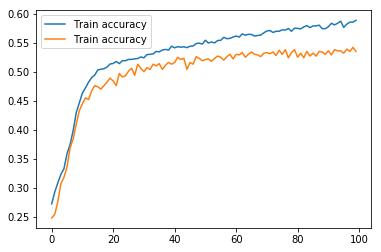

In [335]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Train accuracy')
plt.legend()

In [385]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 290)         8410      
_________________________________________________________________
lstm_41 (LSTM)               (None, None, 128)         214528    
_________________________________________________________________
lstm_42 (LSTM)               (None, None, 64)          49408     
_________________________________________________________________
dense_242 (Dense)            (None, None, 15)          975       
_________________________________________________________________
dense_243 (Dense)            (None, None, 4)           64        
Total params: 273,385
Trainable params: 273,385
Non-trainable params: 0
_________________________________________________________________


In [422]:
model = Sequential()

model.add(Embedding(29, output_dim=29))
model.add(LSTM(29, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [424]:
history = model.fit(train_X, train_Y, epochs=150, batch_size=128, verbose=0, validation_data=(test_X, test_Y))

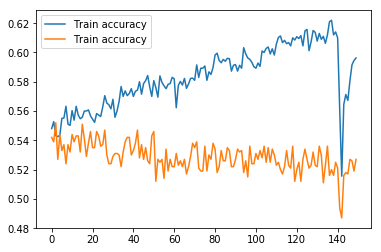

In [425]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Train accuracy')
plt.legend()

In [426]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, None, 29)          841       
_________________________________________________________________
lstm_52 (LSTM)               (None, 29)                6844      
_________________________________________________________________
dense_266 (Dense)            (None, 10)                300       
_________________________________________________________________
dense_267 (Dense)            (None, 4)                 44        
Total params: 8,029
Trainable params: 8,029
Non-trainable params: 0
_________________________________________________________________


In [415]:
model = Sequential()
model.add(Dense(4, activation='softmax'))

In [416]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, epochs=50, batch_size=64, verbose=0, validation_data=(test_X, test_Y))

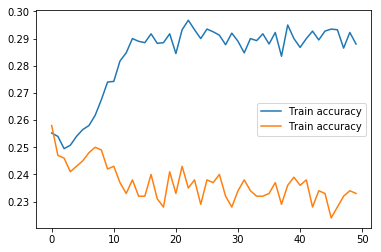

In [417]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Train accuracy')
plt.legend()

In [418]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_263 (Dense)            (None, 4)                 120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


Fully connected, CNN and RNN all reached pretty much the same about 55% accuracy on the validation set. Adding more layers or neurons really only helps to overfit and the validation accuracy never seems to go over 60% with the few architectures that I tested. Clearly the logistic regression model is really bad and at 25% accuracy it is no better than guessing, so at least a few layers are needed to achieve decent results on this dataset. Generally on this problem a smaller network seems to work best, maybe that is due to the relatively low dimensionality of the problem.

In [430]:
model = Sequential()
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=250, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [432]:

history = model.fit(train_X, train_Y, epochs=50, batch_size=64, verbose=1, validation_data=(test_X, test_Y))

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 89us/step - loss: 0.7201 - acc: 0.6877 - val_loss: 0.9871 - val_acc: 0.5560
Epoch 2/50
4000/4000 [==============================] - 0s 90us/step - loss: 0.6490 - acc: 0.7242 - val_loss: 1.0387 - val_acc: 0.5600
Epoch 3/50
4000/4000 [==============================] - 0s 88us/step - loss: 0.6126 - acc: 0.7433 - val_loss: 1.0539 - val_acc: 0.5420
Epoch 4/50
4000/4000 [==============================] - 0s 90us/step - loss: 0.5657 - acc: 0.7652 - val_loss: 1.1146 - val_acc: 0.5490
Epoch 5/50
4000/4000 [==============================] - 0s 89us/step - loss: 0.4823 - acc: 0.8037 - val_loss: 1.1679 - val_acc: 0.5330
Epoch 6/50
4000/4000 [==============================] - 0s 91us/step - loss: 0.4137 - acc: 0.8448 - val_loss: 1.2943 - val_acc: 0.5180
Epoch 7/50
4000/4000 [==============================] - 0s 88us/step - loss: 0.3443 - acc: 0.8648 - val_loss: 1.4226 - val_acc: 0.5100
Epoch 8

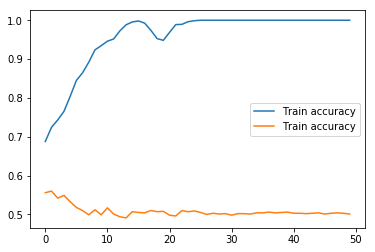

In [433]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Train accuracy')
plt.legend()